# Gerrymadering & Polarization Study

- Author: Simon Lee (simonlee711@g.ucla.edu)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob

plt.style.use('ggplot')

#### DW Nominate Score Analysis

What is Nominate Score (Source Wikipedia):

---

<em>NOMINATE (an acronym for Nominal Three-Step Estimation) is a multidimensional scaling application developed by US political scientists Keith T. Poole and Howard Rosenthal in the early 1980s to analyze preferential and choice data, such as legislative roll-call voting behavior.[1][2] In its most well-known application, members of the US Congress are placed on a two-dimensional map, with politicians who are ideologically similar (i.e. who often vote the same) being close together. One of these two dimensions corresponds to the familiar left–right political spectrum (liberal–conservative in the United States).

As computing capabilities grew, Poole and Rosenthal developed multiple iterations of their NOMINATE procedure: the original D-NOMINATE method, W-NOMINATE, and most recently DW-NOMINATE (for dynamic, weighted NOMINATE). In 2009, Poole and Rosenthal were the first recipients of the Society for Political Methodology's Best Statistical Software Award for their development of NOMINATE.[3] In 2016, the society awarded Poole its Career Achievement Award, stating that "the modern study of the U.S. Congress would be simply unthinkable without NOMINATE legislative roll call voting scores."[4]</em>

In [28]:
# reads in data and gets specific congress and also filters out presidents data 
nominate_score = pd.read_csv('../data/nominate_scores.csv')
print("Before Preprocessing")
display(nominate_score)
nominate_score = nominate_score[nominate_score['chamber'] == 'House'] 
nominate_score = nominate_score[nominate_score['congress'] > 110]
nominate_score = nominate_score[nominate_score['congress'] < 117]

# convert party_code from 200 -> Republican, 100 -> Deomcrat, rest reamins
nominate_score['party_code'] = nominate_score['party_code'].replace([200, 100, 328],
                        ['Republican', 'Democratic', 'Other'])

# reorganize dataframe
nominate_score = nominate_score[['congress', 'chamber', 'district_code', 'state_abbrev', 'party_code', 'bioname', 'nominate_dim1', 'nominate_dim2']]

# Making a start date & end date column. Definitely not the most efficient way to do it but whatever..
conditions = [
    (nominate_score['congress'] == 111),
    (nominate_score['congress'] == 112),
    (nominate_score['congress'] == 113),
    (nominate_score['congress'] == 114),
    (nominate_score['congress'] == 115),
    (nominate_score['congress'] == 116),
    (nominate_score['congress'] == 117)
]
start_values = [2009,2011,2013,2015,2017,2019,2021]
values = [2010,2012,2014,2016,2018,2020,2022]
end_values = [2011,2013,2015,2017,2019,2021,2023]

nominate_score['start_year'] = np.select(conditions, start_values)
nominate_score['year'] = np.select(conditions, values)
nominate_score['end_year'] = np.select(conditions, end_values)

# remove others
nominate_score = nominate_score[~nominate_score['party_code'].isin(['Other'])]

# final dataframe
print("After Preprocessing")
nominate_score

Before Preprocessing


,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,1,President,99869,99,0.0,USA,5000,NaN,NaN,"WASHINGTON, George",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,House,379,44,2.0,GA,4000,0.0,1.0,"BALDWIN, Abraham",...,1807.0,-0.165,-0.373,-28.55029,0.75800,103.0,12.0,NaN,-0.429,-0.817
2,1,House,4854,44,1.0,GA,4000,0.0,1.0,"JACKSON, James",...,1806.0,-0.320,-0.181,-24.89986,0.77600,98.0,9.0,NaN,-0.559,-0.052
3,1,House,6071,44,3.0,GA,4000,0.0,1.0,"MATHEWS, George",...,1812.0,-0.428,-0.317,-12.62728,0.88000,99.0,2.0,NaN,-0.413,-0.232
4,1,House,1538,52,6.0,MD,5000,0.0,1.0,"CARROLL, Daniel",...,1796.0,0.116,-0.740,-23.47008,0.78300,96.0,11.0,NaN,0.114,-0.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50480,118,Senate,40915,56,0.0,WV,100,NaN,NaN,"MANCHIN, Joe, III",...,NaN,-0.060,0.409,-15.58810,0.81886,78.0,7.0,NaN,-0.134,0.424
50481,118,Senate,29940,25,0.0,WI,100,NaN,NaN,"BALDWIN, Tammy",...,NaN,-0.493,-0.134,-4.87620,0.94014,79.0,3.0,NaN,-0.599,0.253
50482,118,Senate,41111,25,0.0,WI,200,NaN,NaN,"JOHNSON, Ron",...,NaN,0.626,-0.148,-9.20443,0.89002,79.0,3.0,NaN,0.656,0.377
50483,118,Senate,20953,68,0.0,WY,200,NaN,NaN,"LUMMIS, Cynthia M.",...,NaN,0.692,-0.353,-10.45930,0.87451,78.0,5.0,NaN,0.943,-0.300


After Preprocessing


,congress,chamber,district_code,state_abbrev,party_code,bioname,nominate_dim1,nominate_dim2,start_year,year,end_year
46070,111,House,1.0,AL,Republican,"BONNER, Jr., Josiah Robins (Jo)",0.367,0.513,2009,2010,2011
46071,111,House,3.0,AL,Republican,"ROGERS, Mike Dennis",0.362,0.462,2009,2010,2011
46072,111,House,7.0,AL,Democratic,"DAVIS, Artur",-0.270,0.454,2009,2010,2011
46073,111,House,2.0,AL,Democratic,"BRIGHT, Bobby Neal, Sr.",0.067,0.671,2009,2010,2011
46074,111,House,5.0,AL,Democratic,"GRIFFITH, Parker",-0.045,0.522,2009,2010,2011
...,...,...,...,...,...,...,...,...,...,...,...
49278,116,House,8.0,WI,Republican,"GALLAGHER, Michael",0.428,0.007,2019,2020,2021
49279,116,House,1.0,WI,Republican,"STEIL, Bryan",0.413,0.045,2019,2020,2021
49280,116,House,7.0,WI,Republican,"TIFFANY, Thomas P.",0.643,-0.206,2019,2020,2021
49281,116,House,3.0,WI,Democratic,"KIND, Ron",-0.260,-0.080,2019,2020,2021


In [29]:
nominate_score = nominate_score.reset_index()
nominate_score = nominate_score.drop("index",axis=1)
nominate_score

,congress,chamber,district_code,state_abbrev,party_code,bioname,nominate_dim1,nominate_dim2,start_year,year,end_year
0,111,House,1.0,AL,Republican,"BONNER, Jr., Josiah Robins (Jo)",0.367,0.513,2009,2010,2011
1,111,House,3.0,AL,Republican,"ROGERS, Mike Dennis",0.362,0.462,2009,2010,2011
2,111,House,7.0,AL,Democratic,"DAVIS, Artur",-0.270,0.454,2009,2010,2011
3,111,House,2.0,AL,Democratic,"BRIGHT, Bobby Neal, Sr.",0.067,0.671,2009,2010,2011
4,111,House,5.0,AL,Democratic,"GRIFFITH, Parker",-0.045,0.522,2009,2010,2011
...,...,...,...,...,...,...,...,...,...,...,...
2676,116,House,8.0,WI,Republican,"GALLAGHER, Michael",0.428,0.007,2019,2020,2021
2677,116,House,1.0,WI,Republican,"STEIL, Bryan",0.413,0.045,2019,2020,2021
2678,116,House,7.0,WI,Republican,"TIFFANY, Thomas P.",0.643,-0.206,2019,2020,2021
2679,116,House,3.0,WI,Democratic,"KIND, Ron",-0.260,-0.080,2019,2020,2021


In [30]:
nominate_score = nominate_score.rename(columns={"district_code": "District", "year": "Year", "state_abbrev": "State"})

In [31]:
n_df = nominate_score.set_index(['District', 'Year', 'State'])
n_df

,,,congress,chamber,party_code,bioname,nominate_dim1,nominate_dim2,start_year,end_year
District,Year,State,,,,,,,,
1.0,2010,AL,111,House,Republican,"BONNER, Jr., Josiah Robins (Jo)",0.367,0.513,2009,2011
3.0,2010,AL,111,House,Republican,"ROGERS, Mike Dennis",0.362,0.462,2009,2011
7.0,2010,AL,111,House,Democratic,"DAVIS, Artur",-0.270,0.454,2009,2011
2.0,2010,AL,111,House,Democratic,"BRIGHT, Bobby Neal, Sr.",0.067,0.671,2009,2011
5.0,2010,AL,111,House,Democratic,"GRIFFITH, Parker",-0.045,0.522,2009,2011
...,...,...,...,...,...,...,...,...,...,...
8.0,2020,WI,116,House,Republican,"GALLAGHER, Michael",0.428,0.007,2019,2021
1.0,2020,WI,116,House,Republican,"STEIL, Bryan",0.413,0.045,2019,2021
7.0,2020,WI,116,House,Republican,"TIFFANY, Thomas P.",0.643,-0.206,2019,2021


#### What do the dimensions mean

Below I have copied a snippet from Wikipedia about the Nominate Score Dimensions and what they mean:

---

<em>Poole and Rosenthal demonstrate that—despite the many complexities of congressional representation and politics—roll call voting in both the House and the Senate can be organized and explained by no more than two dimensions throughout the sweep of American history. The first dimension (horizontal or x-axis) is the familiar left-right (or liberal-conservative) spectrum on economic matters. The second dimension (vertical or y-axis) picks up attitudes on cross-cutting, salient issues of the day (which include or have included slavery, bimetallism, civil rights, regional, and social/lifestyle issues). Rosenthal and Poole have initially argued that the first dimension refers to socio-economic matters and the second dimension to race-relations.[10] However, the often confusing and residual nature of the second dimension has led to the second dimension being largely ignored by other researchers.[11]

For the most part, congressional voting is uni-dimensional, with most of the variation in voting patterns explained by placement along the liberal-conservative first dimension. While the first dimension of the DW-NOMINATE score is able to predict results at 83% accuracy, the addition of the second dimension only increases accuracy to 85%.[10] Furthermore, the second dimension only provided a significant increase in accuracy for Congresses 1-99. As late as the 1990s, the second dimension was able to measure partisan splits in abortion and gun rights issues. However, a 2017 analysis found that since 1987, the votes of the US Congress had best fit a one-dimensional model, suggesting increasing party polarization after 1987.[12]</em>

---

Takeaway: You can ignore dimension 2

Text(0, 0.5, 'race-relations ideology')

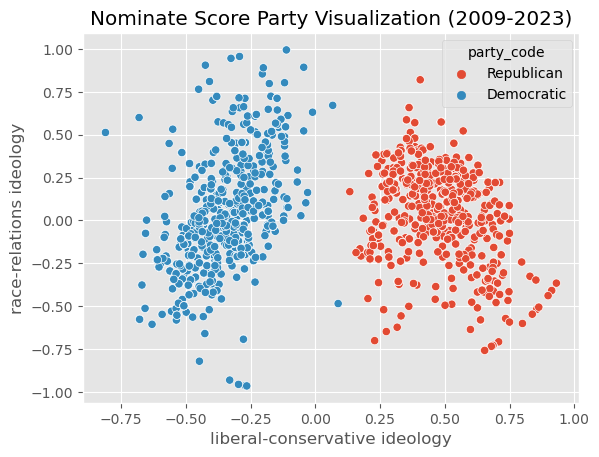

In [32]:
sns.scatterplot(data=nominate_score, x="nominate_dim1", y="nominate_dim2", hue='party_code')
plt.title("Nominate Score Party Visualization (2009-2023)")
plt.xlabel("liberal-conservative ideology")
plt.ylabel("race-relations ideology")

<strong>Fig 1.</strong> Tries to show if there are any outliers or politicians that have opposing views And while we do have a few data points, we can clearly identify two distinct clusrers for deomcrats and republicans aligning with their viewpoints. However the variation among the clusters are spread out indicating that some states are subject to polarisation.

<AxesSubplot:xlabel='congress', ylabel='nominate_dim1'>

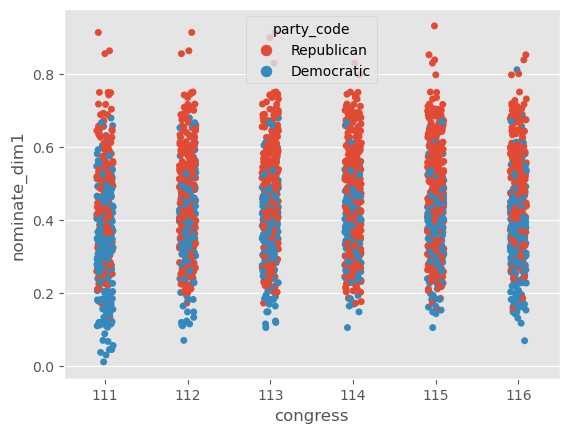

In [33]:
nominate_score['nominate_dim1'] = nominate_score['nominate_dim1'].abs()
sns.stripplot(data =nominate_score, x = 'congress', y='nominate_dim1', hue='party_code')

<AxesSubplot:xlabel='congress', ylabel='nominate_dim1'>

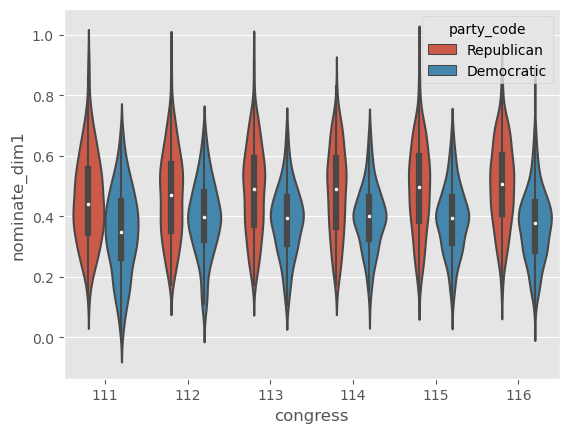

In [34]:
sns.violinplot(data =nominate_score, x = 'congress', y='nominate_dim1', hue='party_code')

#### Efficiency Gap

In [35]:
# use glob to get all the csv files 
# in the folder
path = "../data/"
csv_files = glob.glob(os.path.join(path, "*_election.csv"))
  
  
concat_df = pd.DataFrame()
# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)
      
    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
      
    # print the content
    print('Content:')

    df = df.replace(',','', regex=True)
    df['Republican'] = df['Republican'].astype(int)
    df['Democratic'] = df['Democratic'].astype(int)
    display(df)

    concat_df = pd.concat([concat_df, df])
    print()

Location: ../data/2018_election.csv
File Name: ../data/2018_election.csv
Content:


,Unnamed: 0,District,Democratic,Republican,Year,State
0,0,1st,89226,153228,2018,AL
1,1,2d,86931,138879,2018,AL
2,2,3d,83996,147770,2018,AL
3,3,4th,46492,184255,2018,AL
4,4,5th,101388,159063,2018,AL
...,...,...,...,...,...,...
430,504,5th,138385,225619,2018,WI
431,505,6th,144536,180311,2018,WI
432,506,7th,124307,194061,2018,WI
433,507,8th,119265,209410,2018,WI



Location: ../data/2014_election.csv
File Name: ../data/2014_election.csv
Content:


,Unnamed: 0,District,Republican,Democratic,Year,State
0,0,1st,103758,48278,2014,AL
1,1,2nd,113103,54692,2014,AL
2,2,3rd,103558,52816,2014,AL
3,3,4th,132831,0,2014,AL
4,4,5th,115338,0,2014,AL
...,...,...,...,...,...,...
429,505,5th,231160,101190,2014,WI
430,506,6th,169767,122212,2014,WI
431,507,7th,169891,112949,2014,WI
432,508,8th,188553,101345,2014,WI



Location: ../data/2012_election.csv
File Name: ../data/2012_election.csv
Content:


,Unnamed: 0,District,Republican,Democratic,Year,State
0,0,1st,196374,0,2012,AL
1,1,2d,180591,103092,2012,AL
2,2,3d,175306,98141,2012,AL
3,3,4th,199071,69706,2012,AL
4,4,5th,189185,101772,2012,AL
...,...,...,...,...,...,...
430,551,5th,250335,118478,2012,WI
431,552,6th,223460,135921,2012,WI
432,553,7th,201720,157524,2012,WI
433,554,8th,198874,156287,2012,WI



Location: ../data/2010_election.csv
File Name: ../data/2010_election.csv
Content:


,Unnamed: 0,District,Republican,Democratic,Year,State
0,0,1,121655,95503,2010,NH
1,1,2,108610,105060,2010,NH
2,0,1,65558,99387,2010,IN
3,1,2,88803,91341,2010,IN
4,2,3,116140,61267,2010,IN
...,...,...,...,...,...,...
430,4,5,177235,101146,2010,WA
431,5,6,109800,151873,2010,WA
432,6,7,0,232649,2010,WA
433,7,8,161296,148581,2010,WA



Location: ../data/2020_election.csv
File Name: ../data/2020_election.csv
Content:


,Unnamed: 0,District,Democratic,Republican,Year,State
0,0,1st,116949,211825,2020,AL
1,1,2d,105286,197996,2020,AL
2,2,3d,104595,217384,2020,AL
3,3,4th,56237,261553,2020,AL
4,4,5th,0,253094,2020,AL
...,...,...,...,...,...,...
429,553,5th,175902,265434,2020,WI
430,554,6th,164239,238874,2020,WI
431,555,7th,162741,252048,2020,WI
432,556,8th,149558,268173,2020,WI



Location: ../data/2016_election.csv
File Name: ../data/2016_election.csv
Content:


,Unnamed: 0,District,Republican,Democratic,Year,State
0,0,1st,208083,0,2016,AL
1,1,2d,134886,112089,2016,AL
2,2,3d,192164,94549,2016,AL
3,3,4th,235925,0,2016,AL
4,4,5th,205647,102234,2016,AL
...,...,...,...,...,...,...
430,553,5th,260706,114477,2016,WI
431,554,6th,204147,133072,2016,WI
432,555,7th,223418,138643,2016,WI
433,556,8th,227892,135682,2016,WI


In [36]:
#concat_df =  concat_df.drop("Unnamed: 0",axis=1)
concat_df['total'] = concat_df['Democratic'] + concat_df['Republican']
concat_df['Majority'] = concat_df['total']//2 + 1
concat_df

,Unnamed: 0,District,Democratic,Republican,Year,State,total,Majority
0,0,1st,89226,153228,2018,AL,242454,121228
1,1,2d,86931,138879,2018,AL,225810,112906
2,2,3d,83996,147770,2018,AL,231766,115884
3,3,4th,46492,184255,2018,AL,230747,115374
4,4,5th,101388,159063,2018,AL,260451,130226
...,...,...,...,...,...,...,...,...
430,553,5th,114477,260706,2016,WI,375183,187592
431,554,6th,133072,204147,2016,WI,337219,168610
432,555,7th,138643,223418,2016,WI,362061,181031
433,556,8th,135682,227892,2016,WI,363574,181788


In [37]:
concat_df['District'] = concat_df['District'].str.replace('\D', '', regex=True)
concat_df = concat_df.drop("Unnamed: 0",axis=1)
df = df.replace(' ', np.nan)  
concat_df = concat_df.fillna(1)
concat_df =concat_df.astype({'District':'float'})
concat_df

,District,Democratic,Republican,Year,State,total,Majority
0,1.0,89226,153228,2018,AL,242454,121228
1,2.0,86931,138879,2018,AL,225810,112906
2,3.0,83996,147770,2018,AL,231766,115884
3,4.0,46492,184255,2018,AL,230747,115374
4,5.0,101388,159063,2018,AL,260451,130226
...,...,...,...,...,...,...,...
430,5.0,114477,260706,2016,WI,375183,187592
431,6.0,133072,204147,2016,WI,337219,168610
432,7.0,138643,223418,2016,WI,362061,181031
433,8.0,135682,227892,2016,WI,363574,181788


In [38]:
concat_df = concat_df.reset_index()
concat_df=concat_df.drop("index",axis=1)
concat_df

,District,Democratic,Republican,Year,State,total,Majority
0,1.0,89226,153228,2018,AL,242454,121228
1,2.0,86931,138879,2018,AL,225810,112906
2,3.0,83996,147770,2018,AL,231766,115884
3,4.0,46492,184255,2018,AL,230747,115374
4,5.0,101388,159063,2018,AL,260451,130226
...,...,...,...,...,...,...,...
2603,5.0,114477,260706,2016,WI,375183,187592
2604,6.0,133072,204147,2016,WI,337219,168610
2605,7.0,138643,223418,2016,WI,362061,181031
2606,8.0,135682,227892,2016,WI,363574,181788


In [39]:
concat_df['loser_wasted'] = 0
concat_df['winner_wasted'] = 0

df = concat_df
for i in df.index:
    if df['Democratic'][i] < df['Republican'][i]:
        df.at[i,'loser_wasted'] = df['Democratic'][i]
        df.at[i,'winner_wasted'] = abs(df['Republican'][i] - df['Majority'][i])
    elif df['Democratic'][i] > df['Republican'][i]:
        df.at[i,'loser_wasted'] =  abs(df['Democratic'][i]- df['Majority'][i])
        df.at[i,'winner_wasted'] = df['Republican'][i] 
    
#view the DataFrame
df

,District,Democratic,Republican,Year,State,total,Majority,loser_wasted,winner_wasted
0,1.0,89226,153228,2018,AL,242454,121228,89226,32000
1,2.0,86931,138879,2018,AL,225810,112906,86931,25973
2,3.0,83996,147770,2018,AL,231766,115884,83996,31886
3,4.0,46492,184255,2018,AL,230747,115374,46492,68881
4,5.0,101388,159063,2018,AL,260451,130226,101388,28837
...,...,...,...,...,...,...,...,...,...
2603,5.0,114477,260706,2016,WI,375183,187592,114477,73114
2604,6.0,133072,204147,2016,WI,337219,168610,133072,35537
2605,7.0,138643,223418,2016,WI,362061,181031,138643,42387
2606,8.0,135682,227892,2016,WI,363574,181788,135682,46104


In [40]:
# Calculates efficiency gap
df['efficiency gap'] = (abs(df['loser_wasted'] - df['winner_wasted']))/df['Majority']
df['state'] = df['State']
df['district'] = df['District'] 
df['year'] = df['Year']
df


,District,Democratic,Republican,Year,State,total,Majority,loser_wasted,winner_wasted,efficiency gap,state,district,year
0,1.0,89226,153228,2018,AL,242454,121228,89226,32000,0.472053,AL,1.0,2018
1,2.0,86931,138879,2018,AL,225810,112906,86931,25973,0.539900,AL,2.0,2018
2,3.0,83996,147770,2018,AL,231766,115884,83996,31886,0.449674,AL,3.0,2018
3,4.0,46492,184255,2018,AL,230747,115374,46492,68881,0.194056,AL,4.0,2018
4,5.0,101388,159063,2018,AL,260451,130226,101388,28837,0.557116,AL,5.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,5.0,114477,260706,2016,WI,375183,187592,114477,73114,0.220494,WI,5.0,2016
2604,6.0,133072,204147,2016,WI,337219,168610,133072,35537,0.578465,WI,6.0,2016
2605,7.0,138643,223418,2016,WI,362061,181031,138643,42387,0.531710,WI,7.0,2016
2606,8.0,135682,227892,2016,WI,363574,181788,135682,46104,0.492761,WI,8.0,2016


In [41]:
df= df[df['Democratic'] != 0]
df= df[df['Republican'] != 0]
df = df.set_index(['District', 'Year', 'State'])
df

Democratic  Republican   total  Majority  loser_wasted  \
District Year State                                                           
1.0      2018 AL          89226      153228  242454    121228         89226   
2.0      2018 AL          86931      138879  225810    112906         86931   
3.0      2018 AL          83996      147770  231766    115884         83996   
4.0      2018 AL          46492      184255  230747    115374         46492   
5.0      2018 AL         101388      159063  260451    130226        101388   
...                         ...         ...     ...       ...           ...   
         2016 WI         114477      260706  375183    187592        114477   
6.0      2016 WI         133072      204147  337219    168610        133072   
7.0      2016 WI         138643      223418  362061    181031        138643   
8.0      2016 WI         135682      227892  363574    181788        135682   
1.0      2016 WY          75466      156176  231642    115822         75466   

                     winner_wasted  efficiency gap state  district  year  
District Year State                                                       
1.0      2018 AL             32000        0.472053    AL       1.0  2018  
2.0      2018 AL             25973        0.539900    AL       2.0  2018  
3.0      2018 AL             31886        0.449674    AL       3.0  2018  
4.0      2018 AL             68881        0.194056    AL       4.0  2018  
5.0      2018 AL             28837        0.557116    AL       5.0  2018  
...                            ...             ...   ...       ...   ...  
         2016 WI             73114        0.220494    WI       5.0  2016  
6.0      2016 WI             35537        0.578465    WI       6.0  2016  
7.0      2016 WI             42387        0.531710    WI       7.0  2016  
8.0      2016 WI             46104        0.492761    WI       8.0  2016  
1.0      2016 WY             40354        0.303155    WY       1.0  2016  

[2251 rows x 10 columns]

merge the two dataframes

In [42]:
mega_df = pd.merge(df, n_df, left_index=True, right_index=True)
mega_df

Democratic  Republican   total  Majority  loser_wasted  \
District Year State                                                           
1.0      2010 AK          77606      175384  252990    126496         77606   
              AR          78267       93224  171491     85746         78267   
              AZ          99233      112816  212049    106025         99233   
              CA         147307       72803  220110    110056         37251   
              CO         140073       59747  199820     99911         40162   
...                         ...         ...     ...       ...           ...   
53.0     2010 CA         104800       57230  162030     81016         23784   
         2012 CA         164825      103482  268307    134154         30671   
         2014 CA          87104       60940  148044     74023         13081   
         2016 CA         198988       97968  296956    148479         50509   
         2018 CA         185667       83127  268794    134398         51269   

                     winner_wasted  efficiency gap state  district  year  \
District Year State                                                        
1.0      2010 AK             48888        0.227027    AK       1.0  2010   
              AR              7478        0.825566    AR       1.0  2010   
              AZ              6791        0.871889    AZ       1.0  2010   
              CA             72803        0.323036    CA       1.0  2010   
              CO             59747        0.196024    CO       1.0  2010   
...                            ...             ...   ...       ...   ...   
53.0     2010 CA             57230        0.412832    CA      53.0  2010   
         2012 CA            103482        0.542742    CA      53.0  2012   
         2014 CA             60940        0.646542    CA      53.0  2014   
         2016 CA             97968        0.319634    CA      53.0  2016   
         2018 CA             83127        0.237042    CA      53.0  2018   

                     congress chamber  party_code               bioname  \
District Year State                                                       
1.0      2010 AK          111   House  Republican   YOUNG, Donald Edwin   
              AR          111   House  Democratic  BERRY, Robert Marion   
              AZ          111   House  Democratic      KIRKPATRICK, Ann   
              CA          111   House  Democratic     THOMPSON, Michael   
              CO          111   House  Democratic        DeGETTE, Diana   
...                       ...     ...         ...                   ...   
53.0     2010 CA          111   House  Democratic       DAVIS, Susan A.   
         2012 CA          112   House  Democratic       DAVIS, Susan A.   
         2014 CA          113   House  Democratic       DAVIS, Susan A.   
         2016 CA          114   House  Democratic       DAVIS, Susan A.   
         2018 CA          115   House  Democratic       DAVIS, Susan A.   

                     nominate_dim1  nominate_dim2  start_year  end_year  
District Year State                                                      
1.0      2010 AK             0.283          0.022        2009      2011  
              AR            -0.293          0.956        2009      2011  
              AZ            -0.169         -0.010        2009      2011  
              CA            -0.393          0.067        2009      2011  
              CO            -0.431         -0.306        2009      2011  
...                            ...            ...         ...       ...  
53.0     2010 CA            -0.343         -0.103        2009      2011  
         2012 CA            -0.343         -0.103        2011      2013  
         2014 CA            -0.343         -0.103        2013      2015  
         2016 CA            -0.343         -0.103        2015      2017  
         2018 CA            -0.343         -0.103        2017      2019  

[2268 rows x 18 columns]

In [43]:
mega_df.describe()

,Democratic,Republican,total,Majority,loser_wasted,winner_wasted,efficiency gap,district,year,congress,nominate_dim1,nominate_dim2,start_year,end_year
count,2268.000000,2268.000000,2268.00000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2267.000000,2267.000000,2268.000000,2268.000000
mean,130732.064374,133304.666226,264036.73060,132019.119929,72448.798501,59568.812169,0.481689,9.820988,2015.031746,113.515873,0.082232,0.011331,2014.031746,2016.031746
std,58113.022632,60384.538338,79538.27644,39769.127188,45643.522848,42116.929510,0.276377,10.504758,3.513520,1.756760,0.445188,0.283315,3.513520,3.513520
min,16822.000000,2257.000000,52855.00000,26428.000000,323.000000,2.000000,0.000292,1.000000,2010.000000,111.000000,-0.811000,-0.964000,2009.000000,2011.000000
25%,87247.750000,87825.000000,205414.50000,102708.250000,35078.500000,28503.500000,0.249137,3.000000,2012.000000,112.000000,-0.367000,-0.182000,2011.000000,2013.000000
50%,120832.500000,131167.500000,263504.00000,131752.500000,68102.500000,48673.500000,0.475036,6.000000,2016.000000,114.000000,0.244000,0.013000,2015.000000,2017.000000
75%,166623.000000,176716.750000,321286.25000,160643.750000,103295.500000,82670.500000,0.708145,12.000000,2018.000000,115.000000,0.497000,0.207000,2017.000000,2019.000000
max,387109.000000,339169.000000,601509.00000,300755.000000,262340.000000,222623.000000,0.999970,53.000000,2020.000000,116.000000,0.931000,0.994000,2019.000000,2021.000000


In [44]:
temp = mega_df
temp = temp.reset_index()
temp

,District,Year,State,Democratic,Republican,total,Majority,loser_wasted,winner_wasted,efficiency gap,...,district,year,congress,chamber,party_code,bioname,nominate_dim1,nominate_dim2,start_year,end_year
0,1.0,2010,AK,77606,175384,252990,126496,77606,48888,0.227027,...,1.0,2010,111,House,Republican,"YOUNG, Donald Edwin",0.283,0.022,2009,2011
1,1.0,2010,AR,78267,93224,171491,85746,78267,7478,0.825566,...,1.0,2010,111,House,Democratic,"BERRY, Robert Marion",-0.293,0.956,2009,2011
2,1.0,2010,AZ,99233,112816,212049,106025,99233,6791,0.871889,...,1.0,2010,111,House,Democratic,"KIRKPATRICK, Ann",-0.169,-0.010,2009,2011
3,1.0,2010,CA,147307,72803,220110,110056,37251,72803,0.323036,...,1.0,2010,111,House,Democratic,"THOMPSON, Michael",-0.393,0.067,2009,2011
4,1.0,2010,CO,140073,59747,199820,99911,40162,59747,0.196024,...,1.0,2010,111,House,Democratic,"DeGETTE, Diana",-0.431,-0.306,2009,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,53.0,2010,CA,104800,57230,162030,81016,23784,57230,0.412832,...,53.0,2010,111,House,Democratic,"DAVIS, Susan A.",-0.343,-0.103,2009,2011
2264,53.0,2012,CA,164825,103482,268307,134154,30671,103482,0.542742,...,53.0,2012,112,House,Democratic,"DAVIS, Susan A.",-0.343,-0.103,2011,2013
2265,53.0,2014,CA,87104,60940,148044,74023,13081,60940,0.646542,...,53.0,2014,113,House,Democratic,"DAVIS, Susan A.",-0.343,-0.103,2013,2015
2266,53.0,2016,CA,198988,97968,296956,148479,50509,97968,0.319634,...,53.0,2016,114,House,Democratic,"DAVIS, Susan A.",-0.343,-0.103,2015,2017


In [45]:
district_num = temp.groupby(['State'])['District'].max().astype(int).to_list()

In [46]:
# loop through states and year. Make new dataframe and do the efficiency gap but for state totals like seen on Wikipedia
# Ask Camilla for clarification on which one she wanrs

all_res = []

for year in temp.Year.unique():
    for state in temp.State.unique():
        df = temp[(temp['State']==state) & (temp['Year']==year)]
        df['efficiency gap state'] = (abs(df['loser_wasted'].sum() - df['winner_wasted'].sum()))/df['Majority'].sum()
        all_res.append(df)
mega_df2 = pd.concat(all_res)
mega_df2


/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/896749270.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['efficiency gap state'] = (abs(df['loser_wasted'].sum() - df['winner_wasted'].sum()))/df['Majority'].sum()
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/896749270.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['efficiency gap state'] = (abs(df['loser_wasted'].sum() - df['winner_wasted'].sum()))/df['Majority'].sum()
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1

,District,Year,State,Democratic,Republican,total,Majority,loser_wasted,winner_wasted,efficiency gap,...,year,congress,chamber,party_code,bioname,nominate_dim1,nominate_dim2,start_year,end_year,efficiency gap state
0,1.0,2010,AK,77606,175384,252990,126496,77606,48888,0.227027,...,2010,111,House,Republican,"YOUNG, Donald Edwin",0.283,0.022,2009,2011,0.227027
1,1.0,2010,AR,78267,93224,171491,85746,78267,7478,0.825566,...,2010,111,House,Democratic,"BERRY, Robert Marion",-0.293,0.956,2009,2011,0.226301
276,2.0,2010,AR,80687,122091,202778,101390,80687,20701,0.591636,...,2010,111,House,Democratic,"SNYDER, Victor F.",-0.268,0.055,2009,2011,0.226301
515,3.0,2010,AR,56542,148581,205123,102562,56542,46019,0.102601,...,2010,111,House,Republican,"BOOZMAN, John",0.426,0.332,2009,2011,0.226301
719,4.0,2010,AR,102479,71526,174005,87003,15476,71526,0.644231,...,2010,111,House,Democratic,"ROSS, Michael Avery",-0.201,0.890,2009,2011,0.226301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,36.0,2020,TX,73418,222712,296130,148066,73418,74646,0.008294,...,2020,116,House,Republican,"BABIN, Brian",0.711,0.091,2019,2021,0.242598
232,1.0,2020,AL,116949,211825,328774,164388,116949,47437,0.422853,...,2020,116,House,Republican,"BYRNE, Bradley",0.610,0.250,2019,2021,0.204783
471,2.0,2020,AL,105286,197996,303282,151642,105286,46354,0.388626,...,2020,116,House,Republican,"ROBY, Martha",0.362,0.658,2019,2021,0.204783
681,3.0,2020,AL,104595,217384,321979,160990,104595,56394,0.299404,...,2020,116,House,Republican,"ROGERS, Mike Dennis",0.362,0.462,2019,2021,0.204783


In [47]:
mega_df2 = mega_df2.set_index(['District', 'Year', 'State'])
mega_df2

Democratic  Republican   total  Majority  loser_wasted  \
District Year State                                                           
1.0      2010 AK          77606      175384  252990    126496         77606   
              AR          78267       93224  171491     85746         78267   
2.0      2010 AR          80687      122091  202778    101390         80687   
3.0      2010 AR          56542      148581  205123    102562         56542   
4.0      2010 AR         102479       71526  174005     87003         15476   
...                         ...         ...     ...       ...           ...   
36.0     2020 TX          73418      222712  296130    148066         73418   
1.0      2020 AL         116949      211825  328774    164388        116949   
2.0      2020 AL         105286      197996  303282    151642        105286   
3.0      2020 AL         104595      217384  321979    160990        104595   
4.0      2020 AL          56237      261553  317790    158896         56237   

                     winner_wasted  efficiency gap state  district  year  \
District Year State                                                        
1.0      2010 AK             48888        0.227027    AK       1.0  2010   
              AR              7478        0.825566    AR       1.0  2010   
2.0      2010 AR             20701        0.591636    AR       2.0  2010   
3.0      2010 AR             46019        0.102601    AR       3.0  2010   
4.0      2010 AR             71526        0.644231    AR       4.0  2010   
...                            ...             ...   ...       ...   ...   
36.0     2020 TX             74646        0.008294    TX      36.0  2020   
1.0      2020 AL             47437        0.422853    AL       1.0  2020   
2.0      2020 AL             46354        0.388626    AL       2.0  2020   
3.0      2020 AL             56394        0.299404    AL       3.0  2020   
4.0      2020 AL            102657        0.292141    AL       4.0  2020   

                     congress chamber  party_code               bioname  \
District Year State                                                       
1.0      2010 AK          111   House  Republican   YOUNG, Donald Edwin   
              AR          111   House  Democratic  BERRY, Robert Marion   
2.0      2010 AR          111   House  Democratic     SNYDER, Victor F.   
3.0      2010 AR          111   House  Republican         BOOZMAN, John   
4.0      2010 AR          111   House  Democratic   ROSS, Michael Avery   
...                       ...     ...         ...                   ...   
36.0     2020 TX          116   House  Republican          BABIN, Brian   
1.0      2020 AL          116   House  Republican        BYRNE, Bradley   
2.0      2020 AL          116   House  Republican          ROBY, Martha   
3.0      2020 AL          116   House  Republican   ROGERS, Mike Dennis   
4.0      2020 AL          116   House  Republican      ADERHOLT, Robert   

                     nominate_dim1  nominate_dim2  start_year  end_year  \
District Year State                                                       
1.0      2010 AK             0.283          0.022        2009      2011   
              AR            -0.293          0.956        2009      2011   
2.0      2010 AR            -0.268          0.055        2009      2011   
3.0      2010 AR             0.426          0.332        2009      2011   
4.0      2010 AR            -0.201          0.890        2009      2011   
...                            ...            ...         ...       ...   
36.0     2020 TX             0.711          0.091        2019      2021   
1.0      2020 AL             0.610          0.250        2019      2021   
2.0      2020 AL             0.362          0.658        2019      2021   
3.0      2020 AL             0.362          0.462        2019      2021   
4.0      2020 AL             0.384          0.570        2019      2021   

                     efficiency gap state  
District

In [51]:
mega_df2['nominate_dim1'] = mega_df2['nominate_dim1'].abs()
mega_df2.describe()

,Democratic,Republican,total,Majority,loser_wasted,winner_wasted,efficiency gap,district,year,congress,nominate_dim1,nominate_dim2,start_year,end_year,efficiency gap state
count,2268.000000,2268.000000,2268.00000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2267.000000,2267.000000,2268.000000,2268.000000,2268.000000
mean,130732.064374,133304.666226,264036.73060,132019.119929,72448.798501,59568.812169,0.481689,9.820988,2015.031746,113.515873,0.428219,0.011331,2014.031746,2016.031746,0.219774
std,58113.022632,60384.538338,79538.27644,39769.127188,45643.522848,42116.929510,0.276377,10.504758,3.513520,1.756760,0.146644,0.283315,3.513520,3.513520,0.167568
min,16822.000000,2257.000000,52855.00000,26428.000000,323.000000,2.000000,0.000292,1.000000,2010.000000,111.000000,0.011000,-0.964000,2009.000000,2011.000000,0.002466
25%,87247.750000,87825.000000,205414.50000,102708.250000,35078.500000,28503.500000,0.249137,3.000000,2012.000000,112.000000,0.323500,-0.182000,2011.000000,2013.000000,0.077872
50%,120832.500000,131167.500000,263504.00000,131752.500000,68102.500000,48673.500000,0.475036,6.000000,2016.000000,114.000000,0.420000,0.013000,2015.000000,2017.000000,0.188543
75%,166623.000000,176716.750000,321286.25000,160643.750000,103295.500000,82670.500000,0.708145,12.000000,2018.000000,115.000000,0.530000,0.207000,2017.000000,2019.000000,0.337427
max,387109.000000,339169.000000,601509.00000,300755.000000,262340.000000,222623.000000,0.999970,53.000000,2020.000000,116.000000,0.931000,0.994000,2019.000000,2021.000000,0.952620


Text(0.5, 1.0, 'Boxplots of Efficiency Gap and Nominate Score Distribution')

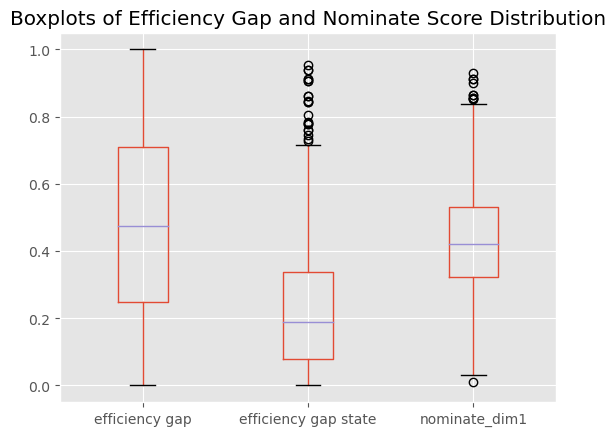

In [49]:
mega_df2.boxplot(column=[ 'efficiency gap', 'efficiency gap state', 'nominate_dim1']) 
plt.title("Boxplots of Efficiency Gap and Nominate Score Distribution")

In [55]:
# One hot encode dw nominate score and efficiency gap by thresholds and plot the results at a District, State and Country Level
# District is normal correlation plots, State is a bar graph counting positive and negative correlation, Country level is a heat map 
mega_df2['EG Thres: 0.08'] = np.where(mega_df2['efficiency gap state']>0.08, 1, 0)
mega_df2['DW Thres: 0.30'] = np.where(mega_df2['nominate_dim1']>0.3, 1, 0)
mega_df2['EG Thres: 0.15'] = np.where(mega_df2['efficiency gap state']>0.15, 1, 0)
mega_df2['DW Thres: 0.40'] = np.where(mega_df2['nominate_dim1']>0.4, 1, 0)
mega_df2['EG Thres: 0.20'] = np.where(mega_df2['efficiency gap state']>0.20, 1, 0)
mega_df2['DW Thres: 0.50'] = np.where(mega_df2['nominate_dim1']>0.5, 1, 0)
mega_df2['corr1'] = mega_df2['EG Thres: 0.08'] + mega_df2['DW Thres: 0.30']
mega_df2['corr2'] = mega_df2['EG Thres: 0.15'] + mega_df2['DW Thres: 0.40']
mega_df2['corr3'] = mega_df2['EG Thres: 0.20'] + mega_df2['DW Thres: 0.50']


In [57]:
# the counts for the correlations
mega_df2['corr1'].value_counts()

2    1359
1     792
0     117
Name: corr1, dtype: int64

In [58]:
mega_df2

Democratic  Republican   total  Majority  loser_wasted  \
District Year State                                                           
1.0      2010 AK          77606      175384  252990    126496         77606   
              AR          78267       93224  171491     85746         78267   
2.0      2010 AR          80687      122091  202778    101390         80687   
3.0      2010 AR          56542      148581  205123    102562         56542   
4.0      2010 AR         102479       71526  174005     87003         15476   
...                         ...         ...     ...       ...           ...   
36.0     2020 TX          73418      222712  296130    148066         73418   
1.0      2020 AL         116949      211825  328774    164388        116949   
2.0      2020 AL         105286      197996  303282    151642        105286   
3.0      2020 AL         104595      217384  321979    160990        104595   
4.0      2020 AL          56237      261553  317790    158896         56237   

                     winner_wasted  efficiency gap state  district  year  ...  \
District Year State                                                       ...   
1.0      2010 AK             48888        0.227027    AK       1.0  2010  ...   
              AR              7478        0.825566    AR       1.0  2010  ...   
2.0      2010 AR             20701        0.591636    AR       2.0  2010  ...   
3.0      2010 AR             46019        0.102601    AR       3.0  2010  ...   
4.0      2010 AR             71526        0.644231    AR       4.0  2010  ...   
...                            ...             ...   ...       ...   ...  ...   
36.0     2020 TX             74646        0.008294    TX      36.0  2020  ...   
1.0      2020 AL             47437        0.422853    AL       1.0  2020  ...   
2.0      2020 AL             46354        0.388626    AL       2.0  2020  ...   
3.0      2020 AL             56394        0.299404    AL       3.0  2020  ...   
4.0      2020 AL            102657        0.292141    AL       4.0  2020  ...   

                     efficiency gap state EG Thres: 0.08 DW Thres: 0.30  \
District Year State                                                       
1.0      2010 AK                 0.227027              1              0   
              AR                 0.226301              1              0   
2.0      2010 AR                 0.226301              1              0   
3.0      2010 AR                 0.226301              1              1   
4.0      2010 AR                 0.226301              1              0   
...                                   ...            ...            ...   
36.0     2020 TX                 0.242598              1              1   
1.0      2020 AL                 0.204783              1              1   
2.0      2020 AL                 0.204783              1              1   
3.0      2020 AL                 0.204783              1              1   
4.0      2020 AL                 0.204783              1              1   

                    EG Thres: 0.15  DW Thres: 0.40  EG Thres: 0.20  \
District Year State                                                  
1.0      2010 AK                 1               0               1   
              AR                 1               0               1   
2.0      2010 AR                 1               0               1   
3.0      2010 AR                 1               1               1   
4.0      2010 AR                 1               0               1   
...                            ...             ...             ...   
36.0     2020 TX                 1               1               1   
1.0      2020 AL                 1               1               1   
2.0      2020 AL                 1               0               1   
3.0      2020 AL                 1               0               1   
4.0      2020 AL                 1               0               1   

                     DW Thres: 0.50  corr1  corr2  c

In [63]:
mega_df2['corr1'] = np.where((mega_df2['corr1']==2) | (mega_df2['corr1'] == 0), 1, 0)
mega_df2['corr2'] = np.where((mega_df2['corr2']==2) | (mega_df2['corr2'] == 0), 1, 0)
mega_df2['corr3'] = np.where((mega_df2['corr3']==2) | (mega_df2['corr3'] == 0), 1, 0)
mega_df2

Democratic  Republican   total  Majority  loser_wasted  \
District Year State                                                           
1.0      2010 AK          77606      175384  252990    126496         77606   
              AR          78267       93224  171491     85746         78267   
2.0      2010 AR          80687      122091  202778    101390         80687   
3.0      2010 AR          56542      148581  205123    102562         56542   
4.0      2010 AR         102479       71526  174005     87003         15476   
...                         ...         ...     ...       ...           ...   
36.0     2020 TX          73418      222712  296130    148066         73418   
1.0      2020 AL         116949      211825  328774    164388        116949   
2.0      2020 AL         105286      197996  303282    151642        105286   
3.0      2020 AL         104595      217384  321979    160990        104595   
4.0      2020 AL          56237      261553  317790    158896         56237   

                     winner_wasted  efficiency gap state  district  year  ...  \
District Year State                                                       ...   
1.0      2010 AK             48888        0.227027    AK       1.0  2010  ...   
              AR              7478        0.825566    AR       1.0  2010  ...   
2.0      2010 AR             20701        0.591636    AR       2.0  2010  ...   
3.0      2010 AR             46019        0.102601    AR       3.0  2010  ...   
4.0      2010 AR             71526        0.644231    AR       4.0  2010  ...   
...                            ...             ...   ...       ...   ...  ...   
36.0     2020 TX             74646        0.008294    TX      36.0  2020  ...   
1.0      2020 AL             47437        0.422853    AL       1.0  2020  ...   
2.0      2020 AL             46354        0.388626    AL       2.0  2020  ...   
3.0      2020 AL             56394        0.299404    AL       3.0  2020  ...   
4.0      2020 AL            102657        0.292141    AL       4.0  2020  ...   

                     efficiency gap state EG Thres: 0.08 DW Thres: 0.30  \
District Year State                                                       
1.0      2010 AK                 0.227027              1              0   
              AR                 0.226301              1              0   
2.0      2010 AR                 0.226301              1              0   
3.0      2010 AR                 0.226301              1              1   
4.0      2010 AR                 0.226301              1              0   
...                                   ...            ...            ...   
36.0     2020 TX                 0.242598              1              1   
1.0      2020 AL                 0.204783              1              1   
2.0      2020 AL                 0.204783              1              1   
3.0      2020 AL                 0.204783              1              1   
4.0      2020 AL                 0.204783              1              1   

                    EG Thres: 0.15  DW Thres: 0.40  EG Thres: 0.20  \
District Year State                                                  
1.0      2010 AK                 1               0               1   
              AR                 1               0               1   
2.0      2010 AR                 1               0               1   
3.0      2010 AR                 1               1               1   
4.0      2010 AR                 1               0               1   
...                            ...             ...             ...   
36.0     2020 TX                 1               1               1   
1.0      2020 AL                 1               1               1   
2.0      2020 AL                 1               0               1   
3.0      2020 AL                 1               0               1   
4.0      2020 AL                 1               0               1   

                     DW Thres: 0.50  corr1  corr2  c

In [62]:
mega_df2['corr1'].value_counts()

1    1476
0     792
Name: corr1, dtype: int64

In [ ]:
# make plots

def district():
    '''
    District for one year
    '''
    pass

def state():
    '''
    State for time series
    '''
    pass

def country():
    '''
    Heat map
    '''
    pass